In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extract data 

In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Casia2.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Casia/")
zip_ref.close()

OSError: ignored

In [0]:
from PIL import Image
import os
from tqdm import tqdm_notebook
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d
import matplotlib.pyplot as plt 
import cv2


In [0]:
RESIZE_SHAPE = (384,256) # Width x Height 

def load_preprocess(image_path,mode="data"):

  image = cv2.imread(image_path)
  
  #image = np.arrayimage)
  num_dim = len(image.shape)
  if mode == "data":
    image = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    image = np.transpose(image,(1,0,2))

  elif mode =="label":
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.T

  image = cv2.resize(image, dsize=RESIZE_SHAPE, interpolation=cv2.INTER_CUBIC)
  return image

def load_label(image_path):

  image = cv2.imread(image_path)
  image = np.array(image)
  if image.shape[0] > image.shape[1]:
    image = image.T
  image = cv2.resize(image, dsize=RESIZE_SHAPE, interpolation=cv2.INTER_CUBIC)

  return image

In [0]:
DATA_PATH = "/content/drive/My Drive/Casia/Casia2/"
AU_PATH = DATA_PATH + "au/images/"
TP_PATH = DATA_PATH + "tp/images/"
EDGES_PATH = DATA_PATH + "tp/edges/"

In [0]:
img = cv2.imread(TP_PATH + "Tp_D_CNN_M_B_nat00056_nat00099_11105.jpg")
img = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)

KeyboardInterrupt: ignored

In [0]:


X_au = []
X_tp = []
EDGES_tp = []

print("Load authentic image")
listdir = os.listdir(AU_PATH)
listdir.sort(key=lambda f:f[:-4])
for IMG_PATH in tqdm_notebook(listdir):
  X_au.append(load_preprocess(AU_PATH + IMG_PATH))

X_au = np.array(X_au)

listdir = os.listdir(TP_PATH)
listdir.sort(key=lambda f:f[:-4])
print("Load tampered image")
for IMG_PATH in tqdm_notebook(listdir):
  X_tp.append(load_preprocess(TP_PATH + IMG_PATH))

X_tp = np.array(X_tp)

listdir = os.listdir(EDGES_PATH)
listdir.sort(key=lambda f:f[:-4])
print("Load tampered edges")
for IMG_PATH in tqdm_notebook(listdir):
  EDGES_tp.append(load_preprocess(EDGES_PATH + IMG_PATH,mode="label"))

EDGES_tp = np.array(EDGES_tp)


Load authentic image



Load tampered image



Load tampered edges


In [0]:
EDGES_tp.shape

(4481, 256, 384)

# Save images array

In [0]:
SPLIT_RATIO = 0.15
NUM_AU = int(X_au.shape[0]*SPLIT_RATIO)
NUM_TP = int(X_tp.shape[0]*SPLIT_RATIO)
X_au_test  = X_au[:NUM_AU]
X_au_train = X_au[NUM_AU:]
X_tp_test = X_tp[:NUM_TP]
X_tp_train = X_tp[NUM_TP:]
EDGES_tp_test = EDGES_tp[:NUM_TP]
EDGES_tp_train = EDGES_tp[NUM_TP:]

In [0]:
print("X_au_test",X_au_test.shape)
print("X_au_train",X_au_train.shape)
print("X_tp_test",X_tp_test.shape)
print("X_tp_train",X_tp_train.shape)
print("EDGES_tp_test",EDGES_tp_test.shape)
print("EDGES_tp_train",EDGES_tp_train.shape)


X_au_test (1123, 256, 384, 3)
X_au_train (6368, 256, 384, 3)
X_tp_test (672, 256, 384, 3)
X_tp_train (3809, 256, 384, 3)
EDGES_tp_test (672, 256, 384)
EDGES_tp_train (3809, 256, 384)


In [0]:
print("1")
np.save(DATA_PATH+"X_au_test.npy",X_au_test)
print("2")
np.save(DATA_PATH+"X_au_train.npy",X_au_train)
print("3")
np.save(DATA_PATH+"X_tp_test.npy",X_tp_test)
print("4")
np.save(DATA_PATH+"X_tp_train.npy",X_tp_train)
print("5")
np.save(DATA_PATH+"EDGES_tp_test.npy",EDGES_tp_test)
print("6")
np.save(DATA_PATH+"EDGES_tp_train.npy",EDGES_tp_train)


1
2
3
4
5
6


In [0]:
import numpy as np

In [0]:
X_au_train = np.load(DATA_PATH+"X_au_train.npy")
X_tp_train = np.load(DATA_PATH+"X_tp_train.npy")
EDGES_tp_train = np.load(DATA_PATH+"EDGES_tp_train.npy")

In [0]:
def img2batch(arr,shape=(32,32)):

  nrows, ncols = shape
  batches = []
  dim = len(arr.shape)
  if dim == 3:
    h, w,_ = arr.shape
  elif dim ==2:
    h, w = arr.shape

  assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
  assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)


  for r in range(h//nrows):
    for c in range(w//ncols):
      from_r = r*nrows
      to_r = (r+1)*nrows
      from_c = c*ncols
      to_c =(c+1)*ncols
      if dim == 3:
        batches.append(arr[from_r:to_r,from_c:to_c,:])
      elif dim==2:
        batches.append(arr[from_r:to_r,from_c:to_c])

  return batches


In [0]:
au_batches_train = []
for item in tqdm_notebook(X_au_train):
  au_batches_train += img2batch(item)

In [0]:
np.save(DATA_PATH+"au_batches_train.npy",np.array(au_batches_train))

In [0]:
edge_batches_train = []
for item in tqdm_notebook(EDGES_tp_train):
  edge_batches_train += img2batch(item)

In [0]:
np.save(DATA_PATH+"edge_batches_train.npy",np.array(edge_batches_train))

In [0]:
tp_batches_train = []
for item in tqdm_notebook(X_tp_train):
  tp_batches_train += img2batch(item)

In [0]:
np.save(DATA_PATH+"tp_batches_train.npy",np.array(tp_batches_train))

In [0]:
edges_batches = np.load(DATA_PATH + "edge_batches_train.npy")
tp_batches = np.load(DATA_PATH + "tp_batches_train.npy")
au_batches = np.load(DATA_PATH + "au_batches_train.npy")

In [0]:
au_batches.shape

(611328, 32, 32, 3)

In [0]:
edges_batches = (edges_batches ==255)*255

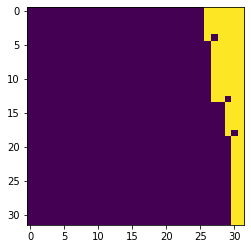

In [0]:
plt.imshow(edges_batches[4])

In [0]:
batch_w = edges_batches[0].shape[1]
batch_h = edges_batches[0].shape[0]
num_pixel = batch_w*batch_h
label_tp = []
for batch in tqdm_notebook(edges_batches):
  num_non_zero = np.count_nonzero(batch ==255)
  portion_edge = num_non_zero/num_pixel
  label_tp.append(num_non_zero/num_pixel)

In [0]:
import collections
collections.Counter(label_tp)

Counter({0.0: 320817,
         0.0009765625: 202,
         0.001953125: 192,
         0.0029296875: 160,
         0.00390625: 191,
         0.0048828125: 161,
         0.005859375: 173,
         0.0068359375: 165,
         0.0078125: 176,
         0.0087890625: 164,
         0.009765625: 147,
         0.0107421875: 141,
         0.01171875: 142,
         0.0126953125: 135,
         0.013671875: 158,
         0.0146484375: 109,
         0.015625: 145,
         0.0166015625: 132,
         0.017578125: 140,
         0.0185546875: 101,
         0.01953125: 104,
         0.0205078125: 100,
         0.021484375: 118,
         0.0224609375: 119,
         0.0234375: 115,
         0.0244140625: 105,
         0.025390625: 131,
         0.0263671875: 110,
         0.02734375: 107,
         0.0283203125: 113,
         0.029296875: 101,
         0.0302734375: 111,
         0.03125: 200,
         0.0322265625: 85,
         0.033203125: 105,
         0.0341796875: 111,
         0.03515625: 99,
      

In [0]:
X  = np.concatenate((tp_batches,au_batches),axis=0)

In [0]:
Y = np.concatenate((np.array(label_tp),np.zeros(au_batches.shape[0])),axis=0)

In [0]:
np.save(DATA_PATH+"X_patch_train.npy",X)
np.save(DATA_PATH+"Y_patch_train.npy",Y)

In [0]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard,ModelCheckpoint
def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(2, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [0]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

NameError: ignored

In [0]:
model.fit(X_train,Y_train,batch_size=128, validation_split=0.2)

Train on 919449 samples, validate on 229863 samples
919449/919449 [==============================] - 31s 34us/sample - loss: 0.2164 - acc: 0.9439 - val_loss: 0.0567 - val_acc: 1.0000
